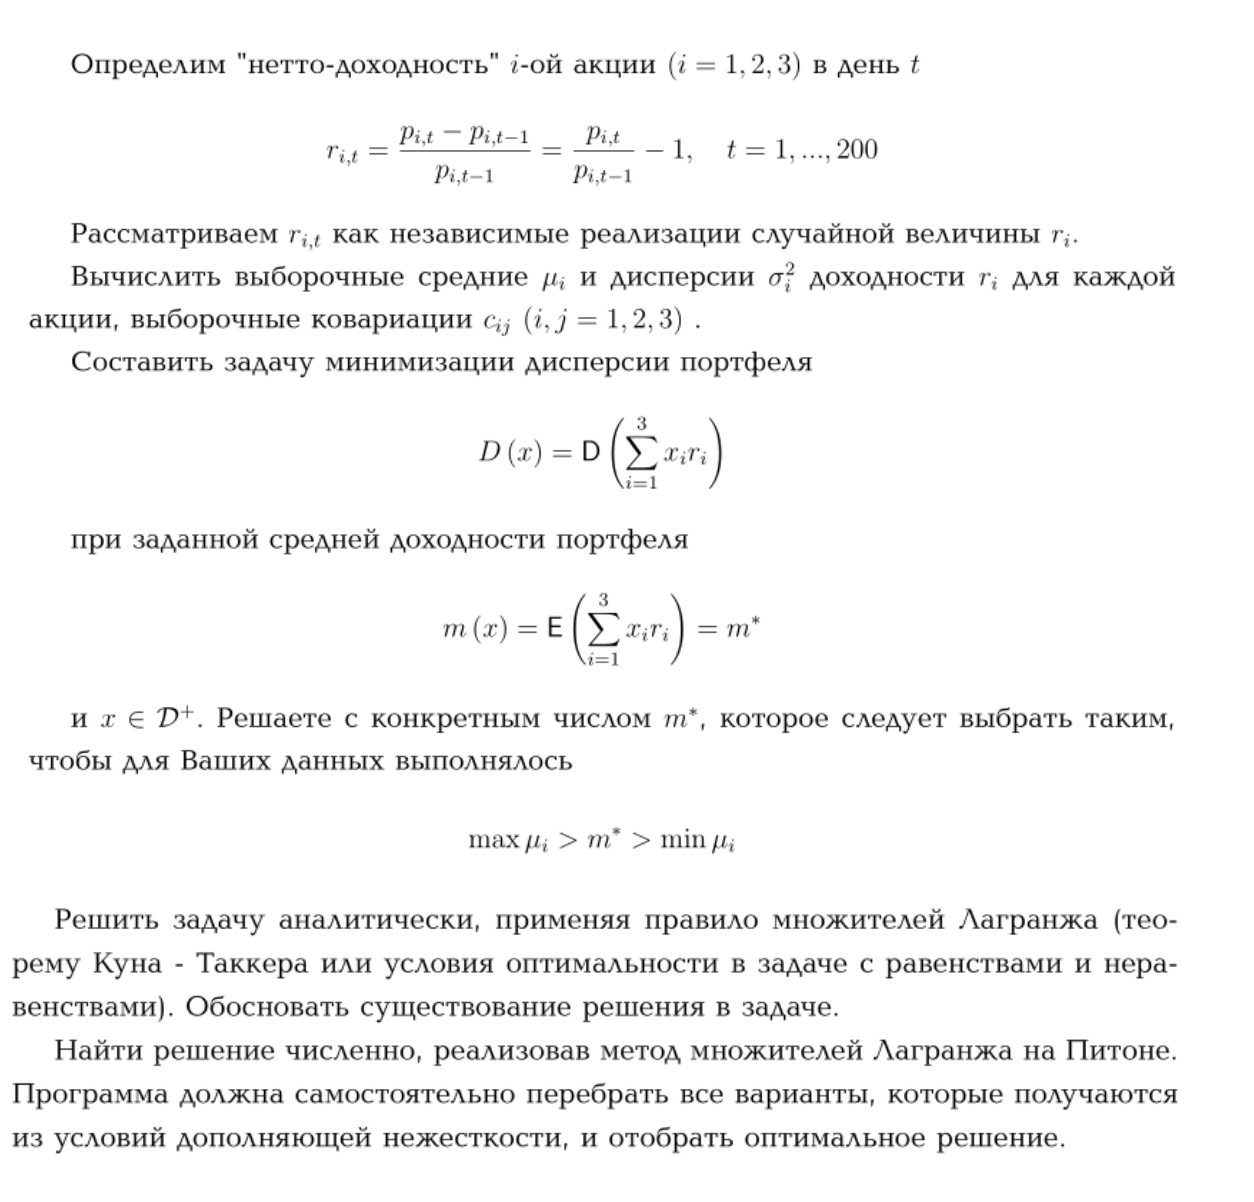

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_nab.csv to data_nab.csv
Saving data_porsche.csv to data_porsche.csv
Saving data_ua.csv to data_ua.csv


In [ ]:
# считываем 201 строку из столбца "Цена"
data1 =  pd.read_csv('data_ua.csv', nrows= 201, usecols= [1])
data2 = pd.read_csv('data_nab.csv', nrows= 201, usecols= [1])
data3 = pd.read_csv('data_porsche.csv', nrows= 201, usecols= [1])
data = [data1, data2, data3]


In [ ]:
# меняем тип данных на float
for i in range(3):
  for j in range(len(data1)):
    try:
      data[i]['Цена'][j]= float(data[i]['Цена'][j].replace(",", "."))
    except:
      print('уже точки вместо запятых')

In [ ]:
# нетто-доходность
r = []

In [ ]:
for i in range(3):
  r.append(list((data[i]['Цена'] - data[i]['Цена'].shift(1)) / data[i]['Цена'].shift(1)))

In [ ]:
r[0].pop(0)
r[1].pop(0)
r[2].pop(0)

nan

In [ ]:
# мат ожидания
ex_val = np.array([np.average(r[0]), np.average(r[1]), np.average(r[2])])
print(ex_val)
# мю со звездой
mu = (ex_val.max() + ex_val.min()) / 2
mu = 0.0001
# матрица ковариации
C = []
for i in range(0,3):
  str_list = []
  for j in range(0, 3):
    str_list.append(np.cov(r[i],r[j])[0][1])
  C.append(str_list)
# дисперсии
disp = [C[0][0], C[1][1], C[2][2]]

[5.04306244e-03 1.63641313e-05 2.82185689e-03]


In [ ]:
import sympy as sym

In [ ]:
x0 = sym.Symbol('x0', nonnegative = True)
x1 = sym.Symbol('x1', nonnegative = True)
x2 = sym.Symbol('x2', nonnegative = True)
l0 = sym.Symbol('l0')
l1 = sym.Symbol('l1')
l2 = sym.Symbol('l2')
l3 = sym.Symbol('l3', nonnegative = True)
l4 = sym.Symbol('l4', nonnegative = True)
l5 = sym.Symbol('l5', nonnegative = True)


In [ ]:
# в регулярном случае (l0 = 0) получается, что все l равны 0, а такого быть не может
l0 = 1
L = l0 * (x0 ** 2 * disp[0] + x1 ** 2 * disp[1] + x2 ** 2 * disp[2] + \
          2 * (x0 * x1 * C[0][1] + x1 * x2 * C[1][2] + x0 * x2 * C[0][2])) + \
          l1 * (x0 * ex_val[0] + x1 * ex_val[1] + x2 * ex_val[2] - mu) + \
          l2 * (x0 + x1 + x2 - 1) - l3 * x0 - l4 * x1 - l5 * x2
L_x0 = sym.diff(L, x0)
L_x1 = sym.diff(L, x1)
L_x2 = sym.diff(L, x2)
eq1 = x0 + x1 + x2 - 1
eq2 = x0 * ex_val[0] + x1 * ex_val[1] + x2 * ex_val[2] - mu
eq3 = l3 * x0
eq4 = l4 * x1
eq5 = l5 * x2
res = sym.solve([L_x0, L_x1, L_x2, eq1, eq2, eq3, eq4, eq5], [x0, x1, x2, l1, l2, l3, l4, l5], dict = True)
res

[{x0: 0.0,
  x1: 0.970188527999714,
  x2: 0.0298114720002857,
  l1: 0.0535270419002966,
  l2: -0.000731535042837222,
  l3: 0.000157882007912208,
  l4: 0.0,
  l5: 0.0}]

Следовательно для минимизации дисперсии портфеля из 3 акций, оптимальная стратегия следующая: в акции первой компании (Under Armour) вкладываться не стоит, около 97% активов нужно вложить в акции второй компании (National Australian Bank), и только оставшиеся 3% активов нужно вложить в акуции компании Porsche.